<a href="https://colab.research.google.com/github/MichaelYuan2/Coursera-ML-AndrewNg-Notes/blob/main/code/Week1-Linear%20Regression/ML_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Simple Linear Regression**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [28]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


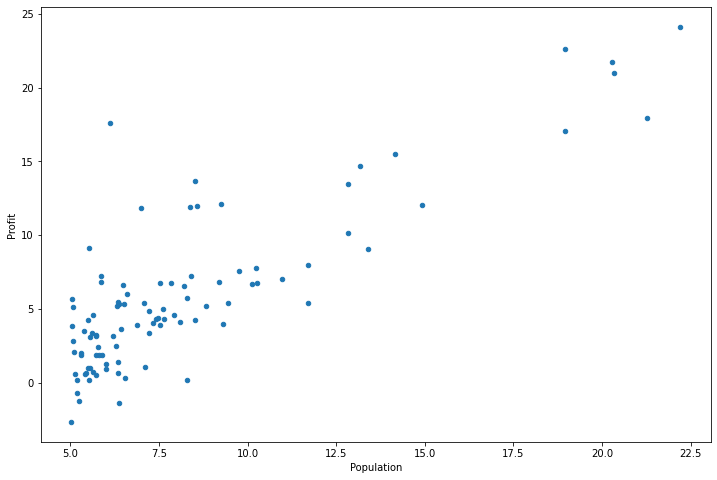

In [29]:
data.plot(kind='scatter', x='Population', y="Profit", figsize=(12,8))
plt.show()

In [30]:
def computeCost(X, y, theta):
  inner = np.power(((X * theta.T) - y), 2)
  return np.sum(inner) / (2*len(X))

In [31]:
data.insert(0, 'Ones', 1)

In [32]:
#set X(training variable) and y(target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:, cols-1:cols]

In [33]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [34]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [35]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) #theta by defaut is 0

In [36]:
theta

matrix([[0, 0]])

In [37]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [38]:
computeCost(X,y,theta)

32.072733877455676

### **Batch gradient decent**


In [67]:
def gradientDescent(X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  cost = np.zeros(iters)

  for i in range(iters):
    error = (X * theta.T) - y

    for j in range(parameters):
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

    theta = temp
    cost[i] = computeCost(X, y, theta)

  return theta, cost

In [68]:
alpha = 0.01
iters = 1000

In [69]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [70]:
computeCost(X, y, g)

4.515955503078914

绘制线性模型及数据点

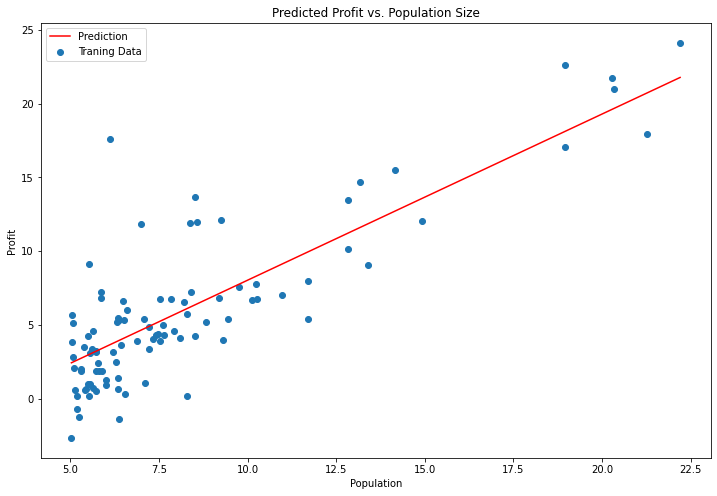

In [71]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

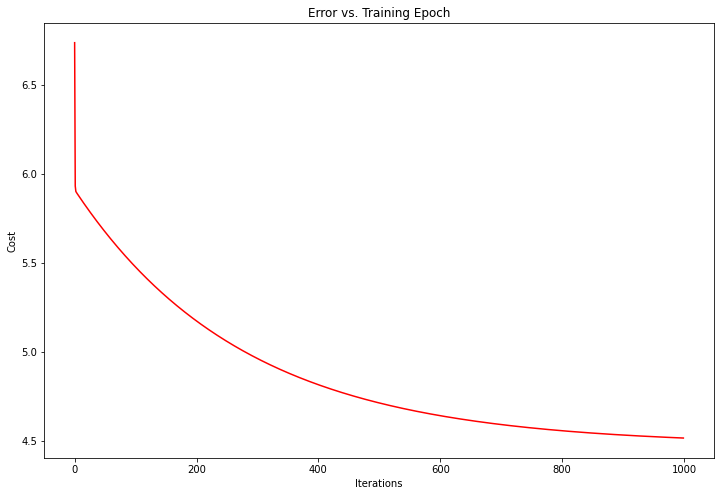

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### **利用scikit-learn的线性回归函数并观察表现**

In [76]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


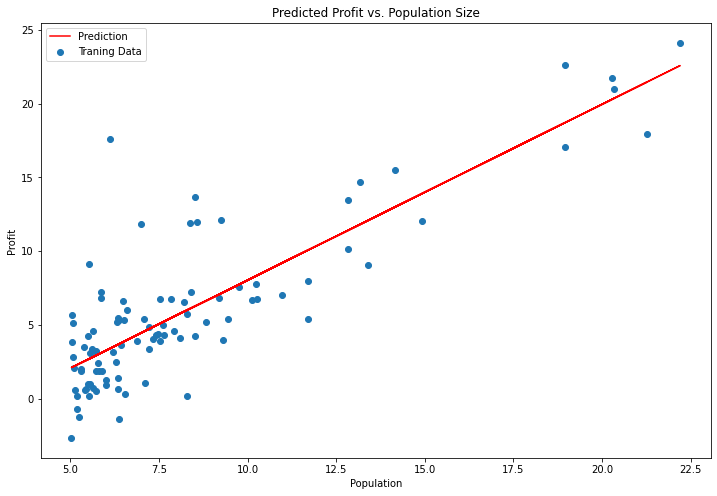

In [77]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()